In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle, Arc
%matplotlib inline

import datetime

from team_player_ids import *
from fuzzywuzzy import fuzz, process

In [78]:
from draw_court import draw_court


In [77]:
del draw_court

In [58]:
def extract_date_from_matchup(matchup):
    return datetime.datetime.strptime(matchup[:12], "%b %d, %Y").date()


def extract_team_from_matchup(matchup):
    away = '@' in matchup
    if away:
        tm = matchup.split(' ')[-1]
    else:
        tm = matchup.split(' ')[-3]
    return tm

def extract_oppenent_from_matchup(matchup):
    away = '@' in matchup
    if away:
        opp = matchup.split(' ')[-3]
    else:
        opp = matchup.split(' ')[-1]
    return opp

def get_player_by_id(id):
    for p in players:
        if p['playerId'] == id:
            return p['firstName'] + ' ' + p['lastName']
        
def find_player(fname, lname):
    matches = {}
    pnames = [(p['firstName'], p['lastName']) for p in players]
    for ii, p in enumerate(pnames):
        matches[ii] = np.mean((fuzz.partial_ratio(fname, p[0]), fuzz.partial_ratio(lname, p[1])))
    top_score, top_ii = 0, None
    for ii in matches:
        if matches[ii] > top_score:
            top_score = matches[ii]
            top_ii = ii
    return players[top_ii]

In [2]:
df15 = pd.read_csv('shot_chart201415.csv')
df14 = pd.read_csv('shot_chart201314.csv')

In [27]:
# df14.insert(2, 'dt', df14.MATCHUP.apply(lambda m: extract_date_from_matchup(m)))
# df14.insert(4, 'opp', df14.5ATCHUP.apply(lambda m: extract_oppenent_from_matchup(m)))
# df14.insert(5, 'tm', df14.MATCHUP.apply(lambda m: extract_team_from_matchup(m)))
# df14.insert(1, 'player', df14.playerId.apply(lambda i: get_player_by_id(i)))
# df14['season'] =  201314

# df15.insert(2, 'dt', df15.MATCHUP.apply(lambda m: extract_date_from_matchup(m)))
# df15.insert(4, 'opp', df15.5ATCHUP.apply(lambda m: extract_oppenent_from_matchup(m)))
# df15.insert(5, 'tm', df15.MATCHUP.apply(lambda m: extract_team_from_matchup(m)))
df15.insert(1, 'player', df15.playerId.apply(lambda i: get_player_by_id(i)))
# df15['season'] =  201415

In [72]:
# Steph 201939
# LBJ 2544
# Reggie Jackson: 202704

In [71]:
find_player('Reggie', 'J')

{'firstName': 'Reggie', 'lastName': 'Jackson', 'playerId': 202704}

In [73]:
dfSteph = df15[df15.playerId == 201939]
dfLebron = df15[df15.playerId == 2544]
dfReggie = df15[df15.playerId == 202704]

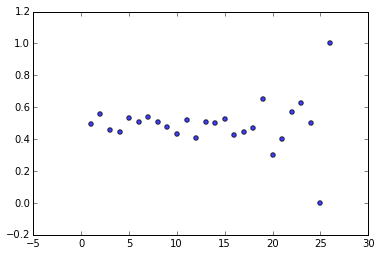

In [53]:
plt.scatter(dfSteph.groupby('SHOT_NUMBER')[['FGM']].mean().index, 
         dfSteph.groupby('SHOT_NUMBER')[['FGM']].mean().values, alpha = 0.75)

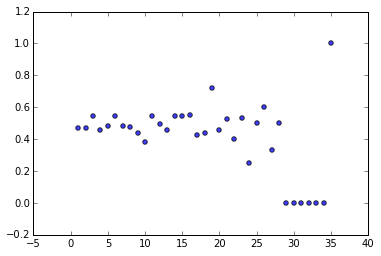

In [62]:
plt.scatter(dfLebron.groupby('SHOT_NUMBER')[['FGM']].mean().index, 
         dfLebron.groupby('SHOT_NUMBER')[['FGM']].mean().values, alpha = 0.75)

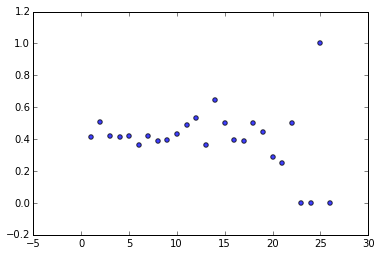

In [74]:
plt.scatter(dfReggie.groupby('SHOT_NUMBER')[['FGM']].mean().index, 
         dfReggie.groupby('SHOT_NUMBER')[['FGM']].mean().values, alpha = 0.75)